In [8]:
import pandas as pd
from pathlib import Path
pd.set_option('display.max_columns', 50)

# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

%matplotlib inline

PATH_DIR= Path('/Users/reza/Documents/methylation_project/IR_TCells/04_DMW_variance_noise/DMR')
PATH_DIR

PosixPath('/Users/reza/Documents/methylation_project/IR_TCells/04_DMW_variance_noise/DMR')

### CFC Batch

#### 1. CFC_01

In [9]:
cfcB_CFC01= pd.read_csv(PATH_DIR/'dmr-CFC_B-CFC_1.txt', sep='\t')
cfcB_CFC01.head()

chr  binid  binstart   binend  meth.x  unmeth.x  meth.y  unmeth.y        m1  \
0   1   3666   2199001  2202000     266        23       5         0  0.917526   
1   1   3667   2199601  2202600     225        23       5         0  0.904000   
2   1   3668   2200201  2203200     238        22       5         0  0.912214   
3   1   3669   2200801  2203800     230        16       5         0  0.931452   
4   1   3670   2201401  2204400     207        13       5         0  0.936937   

    n1        m2  n2       se1       se2    sepool         s       cid  \
0  289  0.857143   5  0.016182  0.156492  0.157327  0.383806 -0.372824   
1  248  0.857143   5  0.018707  0.156492  0.157606  0.297305 -0.385942   
2  260  0.857143   5  0.017550  0.156492  0.157473  0.349716 -0.377921   
3  246  0.857143   5  0.016111  0.156492  0.157319  0.472344 -0.358909   
4  220  0.857143   5  0.016388  0.156492  0.157348  0.507119 -0.353381   

        ciu         p statistic      diff  
0  0.493590  0.720260         t  0.060383  
1  0.479657  0.780640         t  0.046857  
2  0.488063  0.743774         t  0.055071  
3  0.507527  0.660811         t  0.074309  
4  0.512970  0.638206         t  0.079794

In [10]:
cfcB_CFC01[['diff']].var()

diff    0.022192
dtype: float64

In [11]:
len(cfcB_CFC01)

389

In [12]:
cfcB_CFC01_annot= cfcB_CFC01[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cfcB_CFC01_annot['chr'] = str("chr")+ (cfcB_CFC01_annot['chr']).astype(str)

cfcB_CFC01_Bonferroni= cfcB_CFC01_annot.loc[cfcB_CFC01_annot['p'] <= (0.05/len(cfcB_CFC01_annot))]

cfcB_CFC01_annot.to_csv(PATH_DIR/'Annotation/cfcB_CFC01_annotation.txt', sep="\t", header=False, index=False)
cfcB_CFC01_Bonferroni.to_csv(PATH_DIR/'Annotation/cfcB_CFC01_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cfcB_CFC01_annot.head()

chr  binstart   binend         p      diff        m1        m2
0  chr1   2199001  2202000  0.720260  0.060383  0.917526  0.857143
1  chr1   2199601  2202600  0.780640  0.046857  0.904000  0.857143
2  chr1   2200201  2203200  0.743774  0.055071  0.912214  0.857143
3  chr1   2200801  2203800  0.660811  0.074309  0.931452  0.857143
4  chr1   2201401  2204400  0.638206  0.079794  0.936937  0.857143

In [13]:
print("Total number of CpG sites for annotation:", len(cfcB_CFC01_annot))
print("Bonferroni significant number of CpG sites:", len(cfcB_CFC01_Bonferroni))

Total number of CpG sites for annotation: 389
Bonferroni significant number of CpG sites: 0


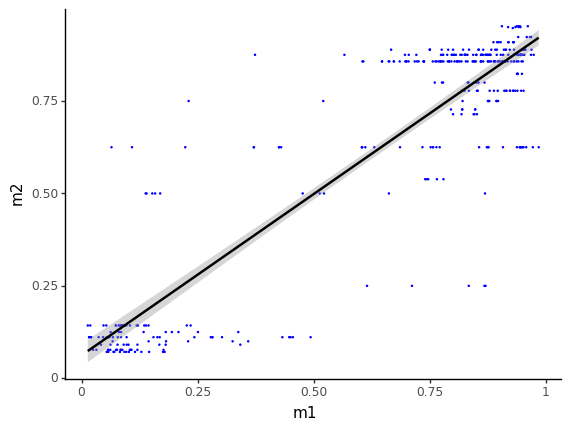

<ggplot: (8788215763472)>

In [14]:
ggplot(cfcB_CFC01, aes(x='m1', y='m2')) + geom_point(color='b', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

#### 2. CFC_02

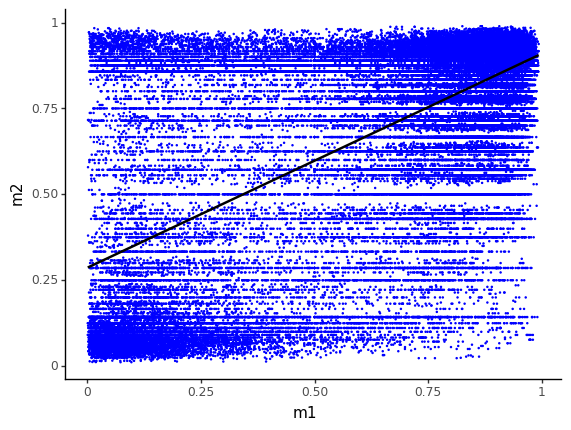

<ggplot: (8788215980036)>

In [15]:
cfcB_CFC02= pd.read_csv(PATH_DIR/'dmr-CFC_B-CFC_2.txt', sep='\t')
ggplot(cfcB_CFC02, aes(x='m1', y='m2')) + geom_point(color='b', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [16]:
cfcB_CFC02[['diff']].var()

diff    0.038909
dtype: float64

In [17]:
cfcB_CFC02_annot= cfcB_CFC02[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cfcB_CFC02_annot['chr'] = str("chr")+ (cfcB_CFC02_annot['chr']).astype(str)

cfcB_CFC02_Bonferroni= cfcB_CFC02_annot.loc[cfcB_CFC02_annot['p'] <= (0.05/len(cfcB_CFC02_annot))]

cfcB_CFC02_annot.to_csv(PATH_DIR/'Annotation/cfcB_CFC02_annotation.txt', sep="\t", header=False, index=False)
cfcB_CFC02_Bonferroni.to_csv(PATH_DIR/'Annotation/cfcB_CFC02_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cfcB_CFC02_Bonferroni.head()

chr  binstart   binend             p      diff        m1        m2
64  chr1    974401   977400  2.665253e-09  0.413312  0.456790  0.043478
65  chr1    975001   978000  1.309022e-10  0.480458  0.523936  0.043478
66  chr1    975601   978600  1.057839e-08  0.533043  0.585674  0.052632
81  chr1   1048801  1051800  3.330669e-15 -0.629643  0.328691  0.958333
82  chr1   1049401  1052400  2.220446e-16 -0.890805  0.067529  0.958333

In [18]:
print("Total number of CpG sites for annotation:", len(cfcB_CFC02_annot))
print("Bonferroni significant number of CpG sites:", len(cfcB_CFC02_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cfcB_CFC02.loc[cfcB_CFC02['p'] <= (0.05/len(cfcB_CFC02))])/len(cfcB_CFC02)*100)

Total number of CpG sites for annotation: 148633
Bonferroni significant number of CpG sites: 1602
Percentage of Bonferroni significant DMRs: 1.077822556229101


#### 3. CFC_03

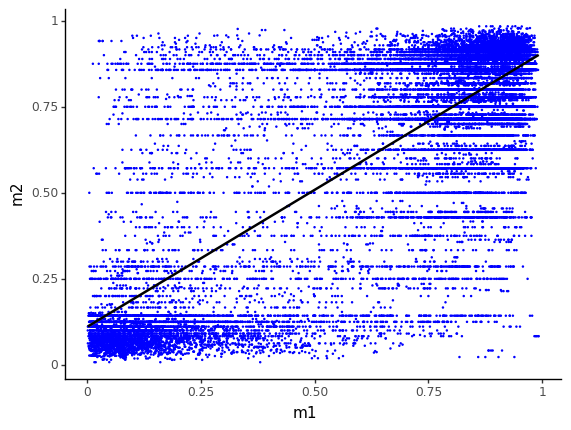

<ggplot: (8788221145573)>

In [19]:
cfcB_CFC03= pd.read_csv(PATH_DIR/'dmr-CFC_B-CFC_3.txt', sep='\t')
ggplot(cfcB_CFC03, aes(x='m1', y='m2')) + geom_point(color='b', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [20]:
cfcB_CFC03[['diff']].var()

diff    0.03223
dtype: float64

In [21]:
cfcB_CFC03_annot= cfcB_CFC03[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cfcB_CFC03_annot['chr'] = str("chr")+ (cfcB_CFC03_annot['chr']).astype(str)

cfcB_CFC03_Bonferroni= cfcB_CFC03_annot.loc[cfcB_CFC03_annot['p'] <= (0.05/len(cfcB_CFC03_annot))]

cfcB_CFC03_annot.to_csv(PATH_DIR/'Annotation/cfcB_CFC03_annotation.txt', sep="\t", header=False, index=False)
cfcB_CFC03_Bonferroni.to_csv(PATH_DIR/'Annotation/cfcB_CFC03_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cfcB_CFC03_Bonferroni.head()

chr  binstart    binend             p      diff        m1        m2
88    chr1   1561801   1564800  2.558282e-08  0.555611  0.646520  0.090909
541   chr1  16825801  16828800  6.379989e-07  0.298993  0.340659  0.041667
946   chr1  35331601  35334600  6.551636e-08 -0.641125  0.296375  0.937500
1458  chr1  93424201  93427200  0.000000e+00  0.373042  0.380734  0.007692
1459  chr1  93424801  93427800  3.153033e-14  0.153753  0.161446  0.007692

In [22]:
print("Total number of CpG sites for annotation:", len(cfcB_CFC03_annot))
print("Bonferroni significant number of CpG sites:", len(cfcB_CFC03_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cfcB_CFC03.loc[cfcB_CFC03['p'] <= (0.05/len(cfcB_CFC03))])/len(cfcB_CFC03)*100)

Total number of CpG sites for annotation: 33356
Bonferroni significant number of CpG sites: 218
Percentage of Bonferroni significant DMRs: 0.6535555822041011


#### 4. CFC_04

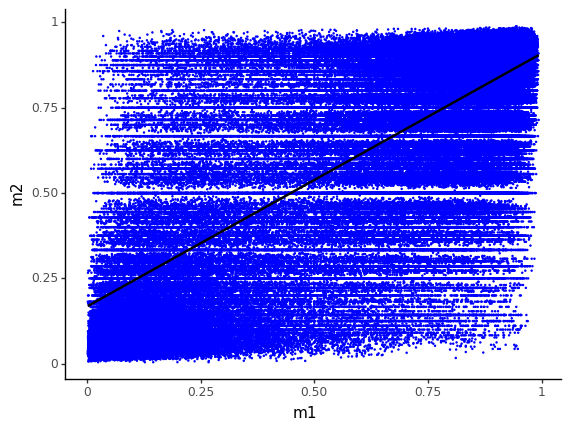

<ggplot: (8788217322436)>

In [23]:
cfcB_CFC04= pd.read_csv(PATH_DIR/'dmr-CFC_B-CFC_4.txt', sep='\t')
ggplot(cfcB_CFC04, aes(x='m1', y='m2')) + geom_point(color='b', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [27]:
cfcB_CFC04[['diff']].var()

diff    0.024106
dtype: float64

In [24]:
cfcB_CFC04_annot= cfcB_CFC04[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cfcB_CFC04_annot['chr'] = str("chr")+ (cfcB_CFC04_annot['chr']).astype(str)

cfcB_CFC04_Bonferroni= cfcB_CFC04_annot.loc[cfcB_CFC04_annot['p'] <= (0.05/len(cfcB_CFC04_annot))]

cfcB_CFC04_annot.to_csv(PATH_DIR/'Annotation/cfcB_CFC04_annotation.txt', sep="\t", header=False, index=False)
cfcB_CFC04_Bonferroni.to_csv(PATH_DIR/'Annotation/cfcB_CFC04_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cfcB_CFC04_Bonferroni.head()


chr  binstart   binend             p      diff        m1        m2
192  chr1    974401   977400  0.000000e+00  0.406790  0.456790  0.050000
193  chr1    975001   978000  3.019807e-13  0.354922  0.523936  0.169014
194  chr1    975601   978600  1.082550e-10  0.369007  0.585674  0.216667
274  chr1   1051201  1054200  1.555576e-09  0.163545  0.193396  0.029851
275  chr1   1051801  1054800  5.291059e-09  0.206725  0.263868  0.057143

In [25]:
print("Total number of CpG sites for annotation:", len(cfcB_CFC04_annot))
print("Bonferroni significant number of CpG sites:", len(cfcB_CFC04_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cfcB_CFC04.loc[cfcB_CFC04['p'] <= (0.05/len(cfcB_CFC04))])/len(cfcB_CFC04)*100)

Total number of CpG sites for annotation: 751441
Bonferroni significant number of CpG sites: 1863
Percentage of Bonferroni significant DMRs: 0.2479236560155754


#### 5. CFC_05

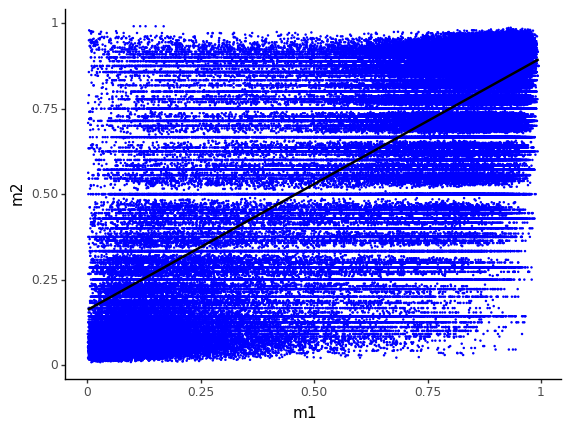

<ggplot: (8788181108363)>

In [26]:
cfcB_CFC05= pd.read_csv(PATH_DIR/'dmr-CFC_B-CFC_5.txt', sep='\t')
ggplot(cfcB_CFC05, aes(x='m1', y='m2')) + geom_point(color='b', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [28]:
cfcB_CFC05[['diff']].var()

diff    0.026092
dtype: float64

In [29]:
cfcB_CFC05_annot= cfcB_CFC05[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cfcB_CFC05_annot['chr'] = str("chr")+ (cfcB_CFC05_annot['chr']).astype(str)

cfcB_CFC05_Bonferroni= cfcB_CFC05_annot.loc[cfcB_CFC05_annot['p'] <= (0.05/len(cfcB_CFC05_annot))]

cfcB_CFC05_annot.to_csv(PATH_DIR/'Annotation/cfcB_CFC05_annotation.txt', sep="\t", header=False, index=False)
cfcB_CFC05_Bonferroni.to_csv(PATH_DIR/'Annotation/cfcB_CFC05_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cfcB_CFC05_Bonferroni.head()


chr  binstart   binend             p      diff        m1        m2
58   chr1    842401   845400  0.000000e+00  0.659580  0.681319  0.021739
59   chr1    843001   846000  4.440892e-16  0.380496  0.402235  0.021739
175  chr1    973801   976800  2.510249e-09  0.287384  0.320717  0.033333
286  chr1   1135201  1138200  6.700486e-08 -0.723123  0.210210  0.933333
368  chr1   1209601  1212600  4.723802e-08  0.631678  0.768041  0.136364

In [30]:
print("Total number of CpG sites for annotation:", len(cfcB_CFC05_annot))
print("Bonferroni significant number of CpG sites:", len(cfcB_CFC05_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cfcB_CFC05.loc[cfcB_CFC05['p'] <= (0.05/len(cfcB_CFC05))])/len(cfcB_CFC05)*100)

Total number of CpG sites for annotation: 473862
Bonferroni significant number of CpG sites: 1330
Percentage of Bonferroni significant DMRs: 0.2806724320582786


### CFL Batch
##### 1.CFL_01

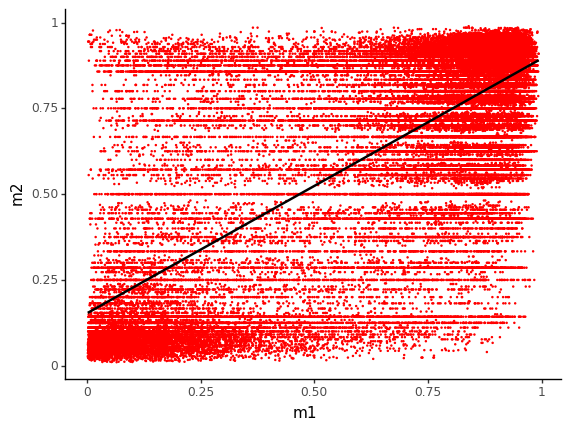

<ggplot: (8788133031150)>

In [31]:
cflB_CFL01= pd.read_csv(PATH_DIR/'dmr-CFL_B-CFL_1.txt', sep='\t')
ggplot(cflB_CFL01, aes(x='m1', y='m2')) + geom_point(color='r', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [33]:
cflB_CFL01[['diff']].var()

diff    0.032863
dtype: float64

In [32]:
cflB_CFL01_annot= cflB_CFL01[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cflB_CFL01_annot['chr'] = str("chr")+ (cflB_CFL01_annot['chr']).astype(str)

cflB_CFL01_Bonferroni= cflB_CFL01_annot.loc[cflB_CFL01_annot['p'] <= (0.05/len(cflB_CFL01_annot))]

cflB_CFL01_annot.to_csv(PATH_DIR/'Annotation/cflB_CFL01_annotation.txt', sep="\t", header=False, index=False)
cflB_CFL01_Bonferroni.to_csv(PATH_DIR/'Annotation/cflB_CFL01_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cflB_CFL01_Bonferroni.head()


chr  binstart   binend             p      diff        m1        m2
30  chr1    868801   871800  1.162043e-08 -0.546557  0.397887  0.944444
31  chr1    869401   872400  1.653530e-07 -0.470924  0.473520  0.944444
94  chr1   1106401  1109400  5.215828e-12  0.490932  0.593496  0.102564
95  chr1   1107001  1110000  3.398615e-12  0.493181  0.595745  0.102564
96  chr1   1107601  1110600  1.776357e-15  0.612490  0.715054  0.102564

In [42]:
print("Total number of CpG sites for annotation:", len(cflB_CFL01_annot))
print("Bonferroni significant number of CpG sites:", len(cflB_CFL01_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cflB_CFL01.loc[cflB_CFL01['p'] <= (0.05/len(cflB_CFL01))])/len(cflB_CFL01)*100)

Total number of CpG sites for annotation: 117592
Bonferroni significant number of CpG sites: 664
Percentage of Bonferroni significant DMRs: 0.5646642628750256


#### 2. CFL_02

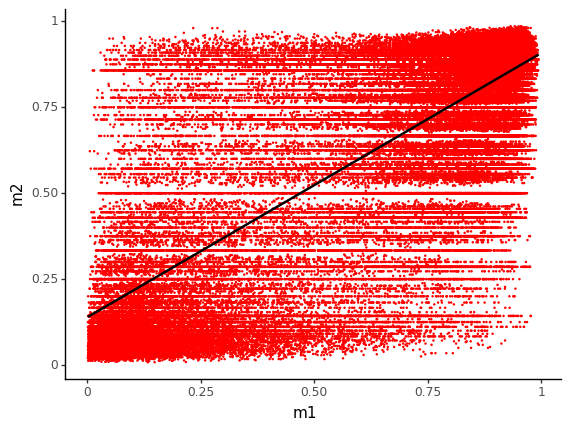

<ggplot: (8788136827892)>

In [43]:
cflB_CFL02= pd.read_csv(PATH_DIR/'dmr-CFL_B-CFL_2.txt', sep='\t')
ggplot(cflB_CFL02, aes(x='m1', y='m2')) + geom_point(color='r', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [44]:
cflB_CFL02[['diff']].var()

diff    0.026008
dtype: float64

In [45]:
cflB_CFL02_annot= cflB_CFL02[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cflB_CFL02_annot['chr'] = str("chr")+ (cflB_CFL02_annot['chr']).astype(str)

cflB_CFL02_Bonferroni= cflB_CFL02_annot.loc[cflB_CFL02_annot['p'] <= (0.05/len(cflB_CFL02_annot))]

cflB_CFL02_annot.to_csv(PATH_DIR/'Annotation/cflB_CFL02_annotation.txt', sep="\t", header=False, index=False)
cflB_CFL02_Bonferroni.to_csv(PATH_DIR/'Annotation/cflB_CFL02_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cflB_CFL02_Bonferroni.head()


chr  binstart   binend             p      diff        m1        m2
52    chr1    895201   898200  2.368575e-08  0.297257  0.334294  0.037037
58    chr1    900001   903000  1.592959e-08 -0.617427  0.287335  0.904762
59    chr1    900601   903600  2.894033e-08 -0.596251  0.308511  0.904762
317   chr1   1371001  1374000  6.709759e-09  0.331595  0.370056  0.038462
1928  chr1   6519001  6522000  3.232190e-08  0.587943  0.646766  0.058824

In [65]:
print("Total number of CpG sites for annotation:", len(cflB_CFL02_annot))
print("Bonferroni significant number of CpG sites:", len(cflB_CFL02_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cflB_CFL02.loc[cflB_CFL02['p'] <= (0.05/len(cflB_CFL02))])/len(cflB_CFL02)*100)

Total number of CpG sites for annotation: 250920
Bonferroni significant number of CpG sites: 871
Percentage of Bonferroni significant DMRs: 0.34712258887294756


#### 3. CFL_03

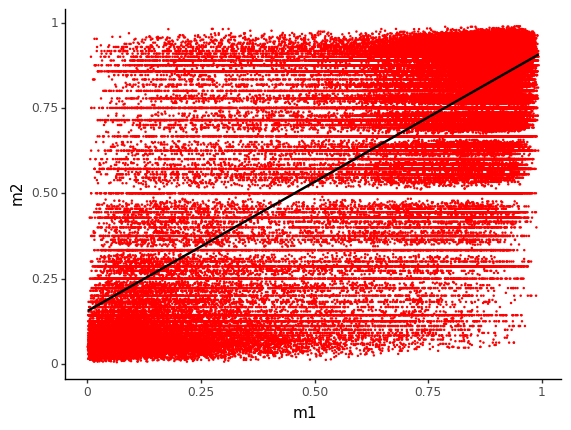

<ggplot: (8788138691904)>

In [66]:
cflB_CFL03= pd.read_csv(PATH_DIR/'dmr-CFL_B-CFL_3.txt', sep='\t')
ggplot(cflB_CFL03, aes(x='m1', y='m2')) + geom_point(color='r', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [67]:
cflB_CFL03[['diff']].var()

diff    0.027268
dtype: float64

In [68]:
cflB_CFL03_annot= cflB_CFL03[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cflB_CFL03_annot['chr'] = str("chr")+ (cflB_CFL03_annot['chr']).astype(str)

cflB_CFL03_Bonferroni= cflB_CFL03_annot.loc[cflB_CFL03_annot['p'] <= (0.05/len(cflB_CFL03_annot))]

cflB_CFL03_annot.to_csv(PATH_DIR/'Annotation/cflB_CFL03_annotation.txt', sep="\t", header=False, index=False)
cflB_CFL03_Bonferroni.to_csv(PATH_DIR/'Annotation/cflB_CFL03_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cflB_CFL03_Bonferroni.head()


chr  binstart   binend             p      diff        m1        m2
201  chr1   1332001  1335000  2.926628e-08  0.161169  0.183391  0.022222
514  chr1   1819201  1822200  1.884102e-09  0.102858  0.110609  0.007752
547  chr1   1873201  1876200  1.108469e-11  0.710360  0.760360  0.050000
548  chr1   1873801  1876800  7.707048e-09  0.641488  0.736726  0.095238
549  chr1   1874401  1877400  7.036799e-09  0.646215  0.741453  0.095238

In [69]:
print("Total number of CpG sites for annotation:", len(cflB_CFL03_annot))
print("Bonferroni significant number of CpG sites:", len(cflB_CFL03_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cflB_CFL03.loc[cflB_CFL03['p'] <= (0.05/len(cflB_CFL03))])/len(cflB_CFL03)*100)

Total number of CpG sites for annotation: 255644
Bonferroni significant number of CpG sites: 1404
Percentage of Bonferroni significant DMRs: 0.5492012329645914


#### 4. CFL_04

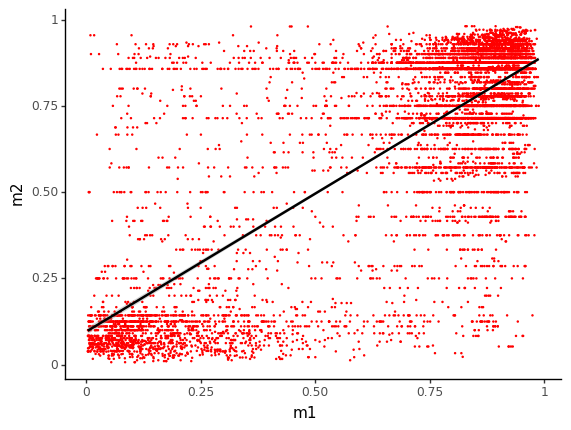

<ggplot: (8788136315618)>

In [70]:
cflB_CFL04= pd.read_csv(PATH_DIR/'dmr-CFL_B-CFL_4.txt', sep='\t')
ggplot(cflB_CFL04, aes(x='m1', y='m2')) + geom_point(color='r', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [71]:
cflB_CFL04[['diff']].var()

diff    0.038086
dtype: float64

In [72]:
cflB_CFL04_annot= cflB_CFL04[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cflB_CFL04_annot['chr'] = str("chr")+ (cflB_CFL04_annot['chr']).astype(str)

cflB_CFL04_Bonferroni= cflB_CFL04_annot.loc[cflB_CFL04_annot['p'] <= (0.05/len(cflB_CFL04_annot))]

cflB_CFL04_annot.to_csv(PATH_DIR/'Annotation/cflB_CFL04_annotation.txt', sep="\t", header=False, index=False)
cflB_CFL04_Bonferroni.to_csv(PATH_DIR/'Annotation/cflB_CFL04_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cflB_CFL04_Bonferroni.head()


chr  binstart    binend             p      diff        m1        m2
54   chr1   2396401   2399400  7.660563e-07  0.425788  0.481343  0.055556
87   chr1   3337801   3340800  6.207101e-07 -0.296891  0.661442  0.958333
130  chr1   9684601   9687600  2.146773e-09  0.253912  0.281690  0.027778
131  chr1   9685201   9688200  4.307995e-08  0.219983  0.247761  0.027778
166  chr1  12224401  12227400  1.345441e-07  0.303284  0.343284  0.040000

In [73]:
print("Total number of CpG sites for annotation:", len(cflB_CFL04_annot))
print("Bonferroni significant number of CpG sites:", len(cflB_CFL04_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cflB_CFL04.loc[cflB_CFL04['p'] <= (0.05/len(cflB_CFL04))])/len(cflB_CFL04)*100)

Total number of CpG sites for annotation: 9648
Bonferroni significant number of CpG sites: 190
Percentage of Bonferroni significant DMRs: 1.9693200663349917


#### 5. CFL_05

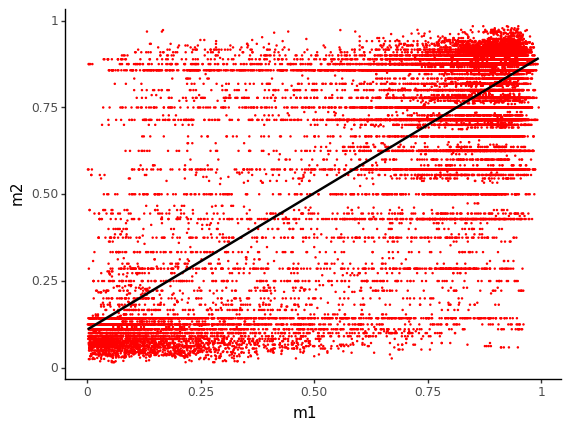

<ggplot: (8788138503623)>

In [80]:
cflB_CFL05= pd.read_csv(PATH_DIR/'dmr-CFL_B-CFL_5.txt', sep='\t')
ggplot(cflB_CFL05, aes(x='m1', y='m2')) + geom_point(color='r', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [81]:
cflB_CFL05[['diff']].var()

diff    0.032534
dtype: float64

In [82]:
cflB_CFL05_annot= cflB_CFL05[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
cflB_CFL05_annot['chr'] = str("chr")+ (cflB_CFL05_annot['chr']).astype(str)

cflB_CFL05_Bonferroni= cflB_CFL05_annot.loc[cflB_CFL05_annot['p'] <= (0.05/len(cflB_CFL05_annot))]

cflB_CFL05_annot.to_csv(PATH_DIR/'Annotation/cflB_CFL05_annotation.txt', sep="\t", header=False, index=False)
cflB_CFL05_Bonferroni.to_csv(PATH_DIR/'Annotation/cflB_CFL05_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

cflB_CFL05_Bonferroni.head()


chr   binstart     binend             p      diff        m1        m2
5     chr1     966001     969000  3.033348e-07  0.416268  0.468900  0.052632
124   chr1    2982001    2985000  0.000000e+00  0.281452  0.303191  0.021739
125   chr1    2982601    2985600  5.153877e-11  0.203471  0.225210  0.021739
224   chr1    6453601    6456600  7.909695e-11 -0.567060  0.385321  0.952381
1845  chr1  150847801  150850800  4.686933e-07 -0.707388  0.221184  0.928571

In [83]:
print("Total number of CpG sites for annotation:", len(cflB_CFL05_annot))
print("Bonferroni significant number of CpG sites:", len(cflB_CFL05_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(cflB_CFL05.loc[cflB_CFL05['p'] <= (0.05/len(cflB_CFL05))])/len(cflB_CFL05)*100)

Total number of CpG sites for annotation: 33110
Bonferroni significant number of CpG sites: 145
Percentage of Bonferroni significant DMRs: 0.4379341588643914


### OFC Batch

#### 1.OFC_01

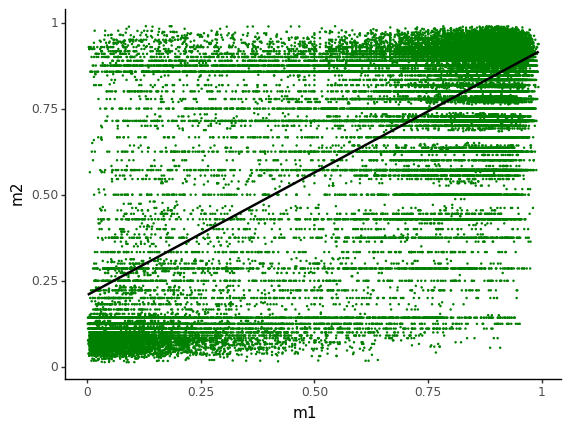

<ggplot: (8785378557796)>

In [78]:
ofcB_OFC01= pd.read_csv(PATH_DIR/'dmr-OFC_B-OFC_1.txt', sep='\t')
ggplot(ofcB_OFC01, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [79]:
ofcB_OFC01[['diff']].var()

diff    0.032953
dtype: float64

In [84]:
ofcB_OFC01_annot= ofcB_OFC01[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
ofcB_OFC01_annot['chr'] = str("chr")+ (ofcB_OFC01_annot['chr']).astype(str)

ofcB_OFC01_Bonferroni= ofcB_OFC01_annot.loc[ofcB_OFC01_annot['p'] <= (0.05/len(ofcB_OFC01_annot))]

ofcB_OFC01_annot.to_csv(PATH_DIR/'Annotation/ofcB_OFC01_annotation.txt', sep="\t", header=False, index=False)
ofcB_OFC01_Bonferroni.to_csv(PATH_DIR/'Annotation/ofcB_OFC01_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

ofcB_OFC01_Bonferroni.head()


chr  binstart    binend             p      diff        m1        m2
71   chr1   1308001   1311000  7.196466e-13  0.322555  0.351967  0.029412
72   chr1   1308601   1311600  8.781331e-11  0.279353  0.308765  0.029412
73   chr1   1309201   1312200  5.000591e-10  0.263761  0.293173  0.029412
904  chr1  11724001  11727000  1.998401e-15 -0.733347  0.221198  0.954545
905  chr1  11724601  11727600  4.779657e-09 -0.442149  0.512397  0.954545

In [85]:
print("Total number of CpG sites for annotation:", len(ofcB_OFC01_annot))
print("Bonferroni significant number of CpG sites:", len(ofcB_OFC01_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(ofcB_OFC01.loc[ofcB_OFC01['p'] <= (0.05/len(ofcB_OFC01))])/len(ofcB_OFC01)*100)

Total number of CpG sites for annotation: 79085
Bonferroni significant number of CpG sites: 520
Percentage of Bonferroni significant DMRs: 0.6575203894543845


#### 2.OFC_02

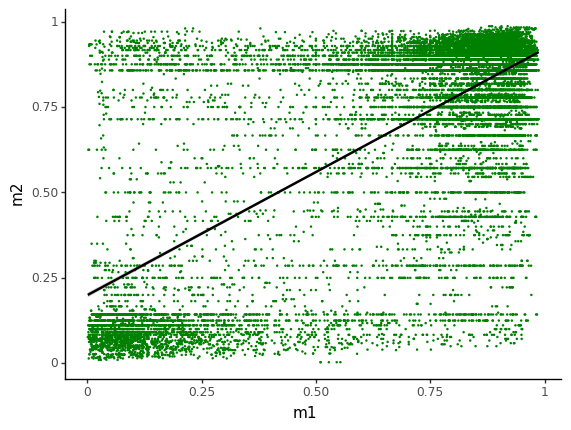

<ggplot: (8785377200903)>

In [86]:
ofcB_OFC02= pd.read_csv(PATH_DIR/'dmr-OFC_B-OFC_2.txt', sep='\t')
ggplot(ofcB_OFC02, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [87]:
ofcB_OFC02[['diff']].var()

diff    0.045223
dtype: float64

In [88]:
ofcB_OFC02_annot= ofcB_OFC02[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
ofcB_OFC02_annot['chr'] = str("chr")+ (ofcB_OFC02_annot['chr']).astype(str)

ofcB_OFC02_Bonferroni= ofcB_OFC02_annot.loc[ofcB_OFC02_annot['p'] <= (0.05/len(ofcB_OFC02_annot))]

ofcB_OFC02_annot.to_csv(PATH_DIR/'Annotation/ofcB_OFC02_annotation.txt', sep="\t", header=False, index=False)
ofcB_OFC02_Bonferroni.to_csv(PATH_DIR/'Annotation/ofcB_OFC02_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

ofcB_OFC02_Bonferroni.head()


chr  binstart   binend             p      diff        m1      m2
62  chr1   2163601  2166600  1.776357e-15  0.572903  0.612903  0.0400
63  chr1   2164201  2167200  2.220446e-16  0.605390  0.645390  0.0400
64  chr1   2164801  2167800  0.000000e+00  0.711445  0.751445  0.0400
65  chr1   2165401  2168400  0.000000e+00  0.681311  0.721311  0.0400
66  chr1   2166001  2169000  6.472478e-08  0.594363  0.656863  0.0625

In [89]:
print("Total number of CpG sites for annotation:", len(ofcB_OFC02_annot))
print("Bonferroni significant number of CpG sites:", len(ofcB_OFC02_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(ofcB_OFC02.loc[ofcB_OFC02['p'] <= (0.05/len(ofcB_OFC02))])/len(ofcB_OFC02)*100)

Total number of CpG sites for annotation: 22971
Bonferroni significant number of CpG sites: 405
Percentage of Bonferroni significant DMRs: 1.763092595011101


#### 3.OFC_03

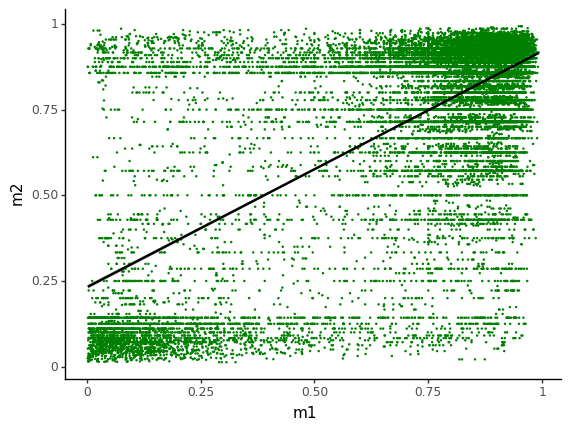

<ggplot: (8785492488328)>

In [90]:
ofcB_OFC03= pd.read_csv(PATH_DIR/'dmr-OFC_B-OFC_3.txt', sep='\t')
ggplot(ofcB_OFC03, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [91]:
ofcB_OFC03[['diff']].var()

diff    0.04305
dtype: float64

In [92]:
ofcB_OFC03_annot= ofcB_OFC03[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
ofcB_OFC03_annot['chr'] = str("chr")+ (ofcB_OFC03_annot['chr']).astype(str)

ofcB_OFC03_Bonferroni= ofcB_OFC03_annot.loc[ofcB_OFC03_annot['p'] <= (0.05/len(ofcB_OFC03_annot))]

ofcB_OFC03_annot.to_csv(PATH_DIR/'Annotation/ofcB_OFC03_annotation.txt', sep="\t", header=False, index=False)
ofcB_OFC03_Bonferroni.to_csv(PATH_DIR/'Annotation/ofcB_OFC03_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

ofcB_OFC03_Bonferroni.head()


chr  binstart    binend             p      diff        m1        m2
459  chr1  24739201  24742200  9.729995e-13  0.294491  0.320132  0.025641
460  chr1  24739801  24742800  1.430526e-09  0.227623  0.253264  0.025641
468  chr1  24882601  24885600  1.129461e-06  0.368750  0.418750  0.050000
600  chr1  32757001  32760000  1.163020e-07 -0.610866  0.283871  0.894737
609  chr1  32801401  32804400  1.503471e-09  0.343355  0.380392  0.037037

In [93]:
print("Total number of CpG sites for annotation:", len(ofcB_OFC03_annot))
print("Bonferroni significant number of CpG sites:", len(ofcB_OFC03_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(ofcB_OFC03.loc[ofcB_OFC03['p'] <= (0.05/len(ofcB_OFC03))])/len(ofcB_OFC03)*100)

Total number of CpG sites for annotation: 28177
Bonferroni significant number of CpG sites: 493
Percentage of Bonferroni significant DMRs: 1.7496539730986267


#### 4.OFC_04

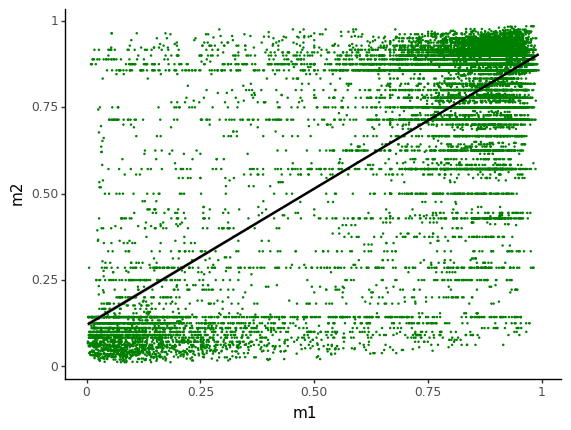

<ggplot: (8785491167208)>

In [94]:
ofcB_OFC04= pd.read_csv(PATH_DIR/'dmr-OFC_B-OFC_4.txt', sep='\t')
ggplot(ofcB_OFC04, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [95]:
ofcB_OFC04[['diff']].var()

diff    0.038178
dtype: float64

In [96]:
ofcB_OFC04_annot= ofcB_OFC04[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
ofcB_OFC04_annot['chr'] = str("chr")+ (ofcB_OFC04_annot['chr']).astype(str)

ofcB_OFC04_Bonferroni= ofcB_OFC04_annot.loc[ofcB_OFC04_annot['p'] <= (0.05/len(ofcB_OFC04_annot))]

ofcB_OFC04_annot.to_csv(PATH_DIR/'Annotation/ofcB_OFC04_annotation.txt', sep="\t", header=False, index=False)
ofcB_OFC04_Bonferroni.to_csv(PATH_DIR/'Annotation/ofcB_OFC04_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

ofcB_OFC04_Bonferroni.head()



chr  binstart    binend             p      diff        m1        m2
234  chr1  10535401  10538400  4.156837e-07 -0.444444  0.500000  0.944444
336  chr1  15340201  15343200  3.192313e-11  0.752464  0.843373  0.090909
337  chr1  15340801  15343800  3.381784e-11  0.767677  0.858586  0.090909
338  chr1  15341401  15344400  4.022205e-11  0.741426  0.832335  0.090909
339  chr1  15342001  15345000  2.666400e-11  0.756225  0.847134  0.090909

In [97]:
print("Total number of CpG sites for annotation:", len(ofcB_OFC04_annot))
print("Bonferroni significant number of CpG sites:", len(ofcB_OFC04_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(ofcB_OFC04.loc[ofcB_OFC04['p'] <= (0.05/len(ofcB_OFC04))])/len(ofcB_OFC04)*100)

Total number of CpG sites for annotation: 18649
Bonferroni significant number of CpG sites: 233
Percentage of Bonferroni significant DMRs: 1.249396750496005


#### 5.OFC_05

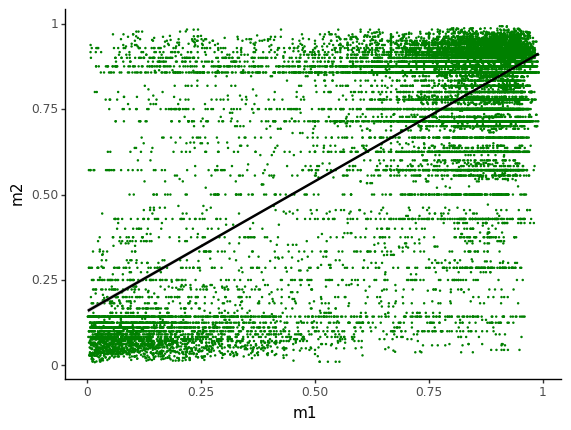

<ggplot: (8785491388603)>

In [98]:
ofcB_OFC05= pd.read_csv(PATH_DIR/'dmr-OFC_B-OFC_5.txt', sep='\t')
ggplot(ofcB_OFC05, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [99]:
ofcB_OFC05[['diff']].var()

diff    0.039913
dtype: float64

In [100]:
ofcB_OFC05_annot= ofcB_OFC05[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
ofcB_OFC05_annot['chr'] = str("chr")+ (ofcB_OFC05_annot['chr']).astype(str)

ofcB_OFC05_Bonferroni= ofcB_OFC05_annot.loc[ofcB_OFC05_annot['p'] <= (0.05/len(ofcB_OFC05_annot))]

ofcB_OFC05_annot.to_csv(PATH_DIR/'Annotation/ofcB_OFC05_annotation.txt', sep="\t", header=False, index=False)
ofcB_OFC05_Bonferroni.to_csv(PATH_DIR/'Annotation/ofcB_OFC05_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

ofcB_OFC05_Bonferroni.head()



chr  binstart   binend             p      diff        m1        m2
45   chr1   1164601  1167600  4.440892e-16  0.281168  0.314501  0.033333
47   chr1   1165801  1168800  3.779776e-11  0.200362  0.233696  0.033333
49   chr1   1167001  1170000  8.398706e-09  0.236045  0.342105  0.106061
86   chr1   1654801  1657800  1.843192e-12  0.317297  0.343612  0.026316
121  chr1   3087601  3090600  3.336122e-07  0.420324  0.549356  0.129032

In [101]:
print("Total number of CpG sites for annotation:", len(ofcB_OFC05_annot))
print("Bonferroni significant number of CpG sites:", len(ofcB_OFC05_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(ofcB_OFC05.loc[ofcB_OFC05['p'] <= (0.05/len(ofcB_OFC05))])/len(ofcB_OFC05)*100)

Total number of CpG sites for annotation: 24327
Bonferroni significant number of CpG sites: 360
Percentage of Bonferroni significant DMRs: 1.4798372179060304


### YFC Batch

#### 1.YFC_01

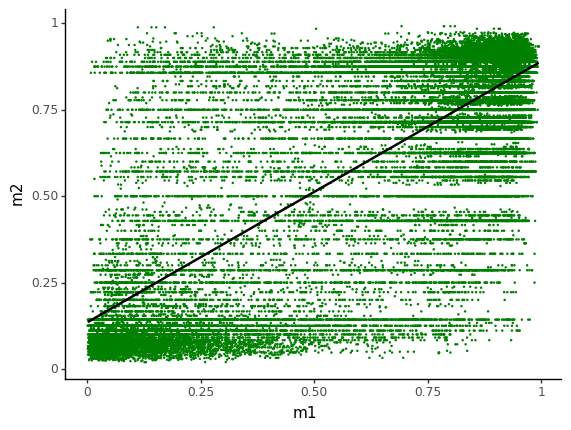

<ggplot: (8785630538837)>

In [102]:
yfcB_YFC01= pd.read_csv(PATH_DIR/'dmr-YFC_B-YFC_1.txt', sep='\t')
ggplot(yfcB_YFC01, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [103]:
yfcB_YFC01[['diff']].var()

diff    0.02958
dtype: float64

In [104]:
yfcB_YFC01_annot= yfcB_YFC01[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yfcB_YFC01_annot['chr'] = str("chr")+ (yfcB_YFC01_annot['chr']).astype(str)

yfcB_YFC01_Bonferroni= yfcB_YFC01_annot.loc[yfcB_YFC01_annot['p'] <= (0.05/len(yfcB_YFC01_annot))]

yfcB_YFC01_annot.to_csv(PATH_DIR/'Annotation/yfcB_YFC01_annotation.txt', sep="\t", header=False, index=False)
yfcB_YFC01_Bonferroni.to_csv(PATH_DIR/'Annotation/yfcB_YFC01_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yfcB_YFC01_Bonferroni.head()



chr  binstart    binend             p      diff        m1        m2
171   chr1   1837801   1840800  1.345923e-07  0.231060  0.263318  0.032258
1068  chr1  12076801  12079800  0.000000e+00 -0.642766  0.320197  0.962963
1069  chr1  12077401  12080400  0.000000e+00 -0.730587  0.232376  0.962963
1070  chr1  12078001  12081000  0.000000e+00 -0.710438  0.252525  0.962963
1071  chr1  12078601  12081600  0.000000e+00 -0.741910  0.221053  0.962963

In [105]:
print("Total number of CpG sites for annotation:", len(yfcB_YFC01_annot))
print("Bonferroni significant number of CpG sites:", len(yfcB_YFC01_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yfcB_YFC01.loc[yfcB_YFC01['p'] <= (0.05/len(yfcB_YFC01))])/len(yfcB_YFC01)*100)

Total number of CpG sites for annotation: 79845
Bonferroni significant number of CpG sites: 239
Percentage of Bonferroni significant DMRs: 0.29932995178157684


#### 2.YFC_02

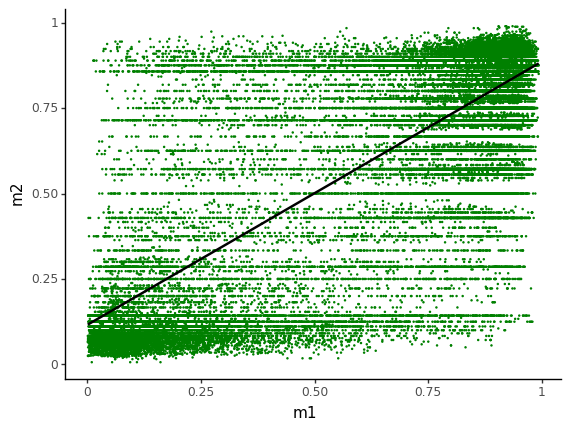

<ggplot: (8785659615814)>

In [106]:
yfcB_YFC02= pd.read_csv(PATH_DIR/'dmr-YFC_B-YFC_2.txt', sep='\t')
ggplot(yfcB_YFC02, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [107]:
yfcB_YFC02[['diff']].var()

diff    0.030341
dtype: float64

In [108]:
yfcB_YFC02_annot= yfcB_YFC02[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yfcB_YFC02_annot['chr'] = str("chr")+ (yfcB_YFC02_annot['chr']).astype(str)

yfcB_YFC02_Bonferroni= yfcB_YFC02_annot.loc[yfcB_YFC02_annot['p'] <= (0.05/len(yfcB_YFC02_annot))]

yfcB_YFC02_annot.to_csv(PATH_DIR/'Annotation/yfcB_YFC02_annotation.txt', sep="\t", header=False, index=False)
yfcB_YFC02_Bonferroni.to_csv(PATH_DIR/'Annotation/yfcB_YFC02_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yfcB_YFC02_Bonferroni.head()



chr  binstart   binend             p      diff        m1        m2
39   chr1    955201   958200  3.968970e-07  0.318881  0.362360  0.043478
76   chr1   1243801  1246800  2.729035e-09  0.272827  0.305085  0.032258
86   chr1   1290601  1293600  1.207923e-12  0.344372  0.375622  0.031250
672  chr1   9597001  9600000  5.804579e-10 -0.638358  0.274686  0.913043
673  chr1   9597601  9600600  1.048552e-10 -0.710680  0.202363  0.913043

In [109]:
print("Total number of CpG sites for annotation:", len(yfcB_YFC02_annot))
print("Bonferroni significant number of CpG sites:", len(yfcB_YFC02_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yfcB_YFC02.loc[yfcB_YFC02['p'] <= (0.05/len(yfcB_YFC02))])/len(yfcB_YFC02)*100)

Total number of CpG sites for annotation: 75189
Bonferroni significant number of CpG sites: 206
Percentage of Bonferroni significant DMRs: 0.2739762465254226


#### 3.YFC_03

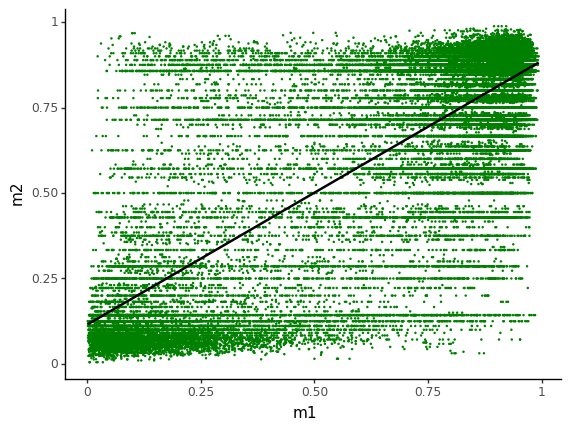

<ggplot: (8785618181620)>

In [110]:
yfcB_YFC03= pd.read_csv(PATH_DIR/'dmr-YFC_B-YFC_3.txt', sep='\t')
ggplot(yfcB_YFC03, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [111]:
yfcB_YFC03[['diff']].var()

diff    0.028936
dtype: float64

In [112]:
yfcB_YFC03_annot= yfcB_YFC03[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yfcB_YFC03_annot['chr'] = str("chr")+ (yfcB_YFC03_annot['chr']).astype(str)

yfcB_YFC03_Bonferroni= yfcB_YFC03_annot.loc[yfcB_YFC03_annot['p'] <= (0.05/len(yfcB_YFC03_annot))]

yfcB_YFC03_annot.to_csv(PATH_DIR/'Annotation/yfcB_YFC03_annotation.txt', sep="\t", header=False, index=False)
yfcB_YFC03_Bonferroni.to_csv(PATH_DIR/'Annotation/yfcB_YFC03_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yfcB_YFC03_Bonferroni.head()



chr  binstart  binend             p      diff        m1        m2
20  chr1    894601  897600  1.393504e-08  0.254491  0.286749  0.032258
21  chr1    895201  898200  8.974155e-12  0.336022  0.368280  0.032258
22  chr1    895801  898800  0.000000e+00  0.482820  0.515078  0.032258
32  chr1    975001  978000  1.513740e-10  0.376561  0.435385  0.058824
33  chr1    975601  978600  1.332268e-15  0.481441  0.515924  0.034483

In [113]:
print("Total number of CpG sites for annotation:", len(yfcB_YFC03_annot))
print("Bonferroni significant number of CpG sites:", len(yfcB_YFC03_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yfcB_YFC03.loc[yfcB_YFC03['p'] <= (0.05/len(yfcB_YFC03))])/len(yfcB_YFC03)*100)

Total number of CpG sites for annotation: 74940
Bonferroni significant number of CpG sites: 230
Percentage of Bonferroni significant DMRs: 0.30691219642380574


#### 4.YFC_04

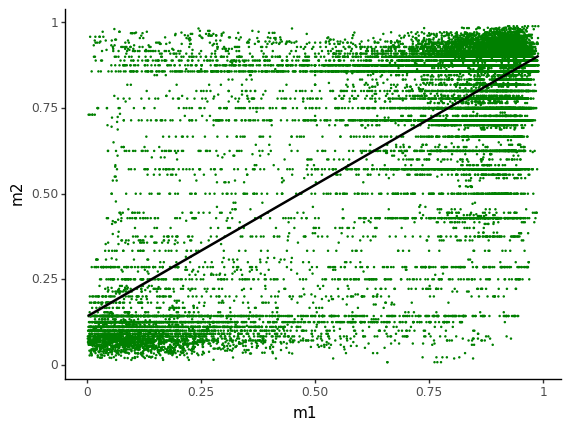

<ggplot: (8785723438171)>

In [114]:
yfcB_YFC04= pd.read_csv(PATH_DIR/'dmr-YFC_B-YFC_4.txt', sep='\t')
ggplot(yfcB_YFC04, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [115]:
yfcB_YFC04[['diff']].var()

diff    0.037099
dtype: float64

In [116]:
yfcB_YFC04_annot= yfcB_YFC04[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yfcB_YFC04_annot['chr'] = str("chr")+ (yfcB_YFC04_annot['chr']).astype(str)

yfcB_YFC04_Bonferroni= yfcB_YFC04_annot.loc[yfcB_YFC04_annot['p'] <= (0.05/len(yfcB_YFC04_annot))]

yfcB_YFC04_annot.to_csv(PATH_DIR/'Annotation/yfcB_YFC04_annotation.txt', sep="\t", header=False, index=False)
yfcB_YFC04_Bonferroni.to_csv(PATH_DIR/'Annotation/yfcB_YFC04_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yfcB_YFC04_Bonferroni.head()



chr  binstart    binend             p      diff        m1        m2
64    chr1   1819201   1822200  1.327718e-07  0.222124  0.252427  0.030303
467   chr1  20206201  20209200  0.000000e+00 -0.666538  0.295000  0.961538
1144  chr1  86043601  86046600  5.462297e-14 -0.827317  0.092683  0.920000
1145  chr1  86044201  86047200  9.614531e-14 -0.877447  0.042553  0.920000
1146  chr1  86044801  86047800  3.101963e-13 -0.791053  0.128947  0.920000

In [117]:
print("Total number of CpG sites for annotation:", len(yfcB_YFC04_annot))
print("Bonferroni significant number of CpG sites:", len(yfcB_YFC04_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yfcB_YFC04.loc[yfcB_YFC04['p'] <= (0.05/len(yfcB_YFC04))])/len(yfcB_YFC04)*100)

Total number of CpG sites for annotation: 28215
Bonferroni significant number of CpG sites: 297
Percentage of Bonferroni significant DMRs: 1.0526315789473684


#### 5. YFC_05

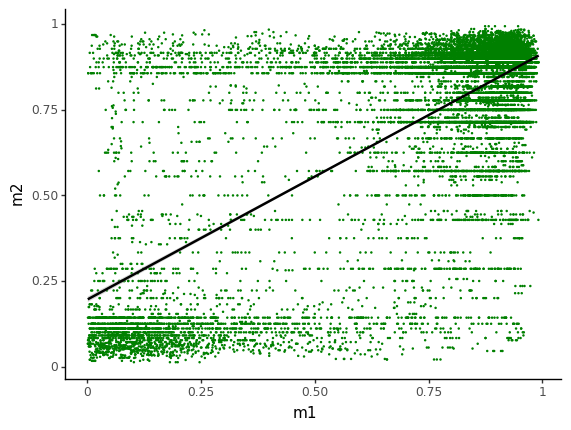

<ggplot: (8785630557537)>

In [118]:
yfcB_YFC05= pd.read_csv(PATH_DIR/'dmr-YFC_B-YFC_5.txt', sep='\t')
ggplot(yfcB_YFC05, aes(x='m1', y='m2')) + geom_point(color='g', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [119]:
yfcB_YFC05[['diff']].var()

diff    0.042358
dtype: float64

In [120]:
yfcB_YFC05_annot= yfcB_YFC05[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yfcB_YFC05_annot['chr'] = str("chr")+ (yfcB_YFC05_annot['chr']).astype(str)

yfcB_YFC05_Bonferroni= yfcB_YFC05_annot.loc[yfcB_YFC05_annot['p'] <= (0.05/len(yfcB_YFC05_annot))]

yfcB_YFC05_annot.to_csv(PATH_DIR/'Annotation/yfcB_YFC05_annotation.txt', sep="\t", header=False, index=False)
yfcB_YFC05_Bonferroni.to_csv(PATH_DIR/'Annotation/yfcB_YFC05_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yfcB_YFC05_Bonferroni.head()



chr  binstart    binend             p      diff        m1        m2
187  chr1  17634601  17637600  3.568132e-10 -0.340597  0.635593  0.976190
220  chr1  21672001  21675000  0.000000e+00 -0.725141  0.257618  0.982759
309  chr1  26660401  26663400  1.003557e-06 -0.612782  0.315789  0.928571
365  chr1  32670601  32673600  4.334427e-07 -0.545747  0.391753  0.937500
450  chr1  41417401  41420400  7.103912e-09 -0.475077  0.448000  0.923077

In [121]:
print("Total number of CpG sites for annotation:", len(yfcB_YFC05_annot))
print("Bonferroni significant number of CpG sites:", len(yfcB_YFC05_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yfcB_YFC05.loc[yfcB_YFC05['p'] <= (0.05/len(yfcB_YFC05))])/len(yfcB_YFC05)*100)

Total number of CpG sites for annotation: 18486
Bonferroni significant number of CpG sites: 319
Percentage of Bonferroni significant DMRs: 1.7256302066428648


### YFL Batch

#### 1. YFL_01

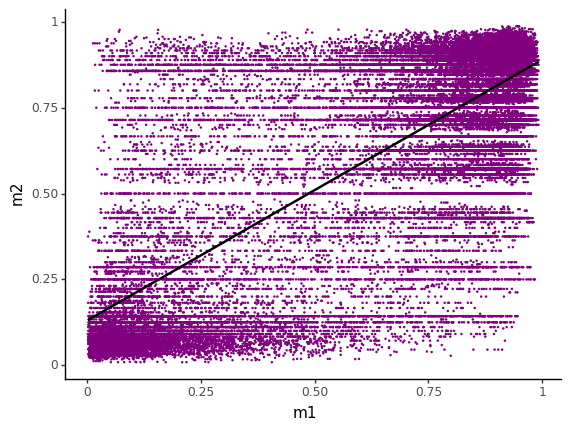

<ggplot: (8785723888388)>

In [123]:
yflB_YFL01= pd.read_csv(PATH_DIR/'dmr-YFL_B-YFL_1.txt', sep='\t')
ggplot(yflB_YFL01, aes(x='m1', y='m2')) + geom_point(color='purple', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [124]:
yflB_YFL01[['diff']].var()

diff    0.03177
dtype: float64

In [125]:
yflB_YFL01_annot= yflB_YFL01[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yflB_YFL01_annot['chr'] = str("chr")+ (yflB_YFL01_annot['chr']).astype(str)

yflB_YFL01_Bonferroni= yflB_YFL01_annot.loc[yflB_YFL01_annot['p'] <= (0.05/len(yflB_YFL01_annot))]

yflB_YFL01_annot.to_csv(PATH_DIR/'Annotation/yflB_YFL01_annotation.txt', sep="\t", header=False, index=False)
yflB_YFL01_Bonferroni.to_csv(PATH_DIR/'Annotation/yflB_YFL01_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yflB_YFL01_Bonferroni.head()



chr  binstart   binend             p      diff        m1        m2
61   chr1   1054801  1057800  1.547144e-09  0.487349  0.587349  0.100000
63   chr1   1056001  1059000  1.210616e-07  0.403226  0.503226  0.100000
64   chr1   1056601  1059600  3.253145e-08  0.428125  0.528125  0.100000
65   chr1   1057201  1060200  3.190158e-09  0.473066  0.573066  0.100000
116  chr1   1405801  1408800  1.511399e-09  0.152983  0.168367  0.015385

In [126]:
print("Total number of CpG sites for annotation:", len(yflB_YFL01_annot))
print("Bonferroni significant number of CpG sites:", len(yflB_YFL01_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yflB_YFL01.loc[yflB_YFL01['p'] <= (0.05/len(yflB_YFL01))])/len(yflB_YFL01)*100)

Total number of CpG sites for annotation: 82290
Bonferroni significant number of CpG sites: 396
Percentage of Bonferroni significant DMRs: 0.4812249362012395


#### 2. YFL_02

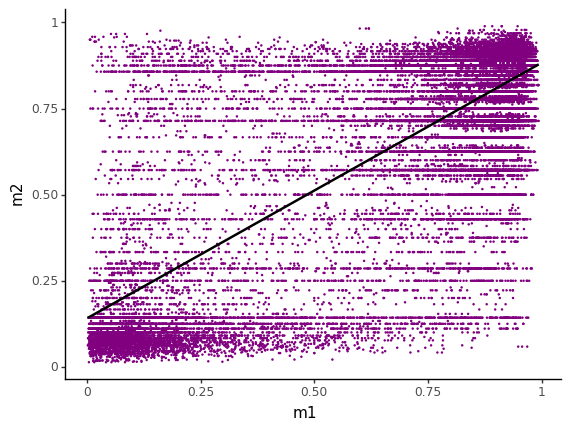

<ggplot: (8785730639351)>

In [134]:
yflB_YFL02= pd.read_csv(PATH_DIR/'dmr-YFL_B-YFL_2.txt', sep='\t')
ggplot(yflB_YFL02, aes(x='m1', y='m2')) + geom_point(color='purple', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [135]:
yflB_YFL02[['diff']].var()

diff    0.034555
dtype: float64

In [136]:
yflB_YFL02_annot= yflB_YFL02[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yflB_YFL02_annot['chr'] = str("chr")+ (yflB_YFL02_annot['chr']).astype(str)

yflB_YFL02_Bonferroni= yflB_YFL02_annot.loc[yflB_YFL02_annot['p'] <= (0.05/len(yflB_YFL02_annot))]

yflB_YFL02_annot.to_csv(PATH_DIR/'Annotation/yflB_YFL02_annotation.txt', sep="\t", header=False, index=False)
yflB_YFL02_Bonferroni.to_csv(PATH_DIR/'Annotation/yflB_YFL02_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yflB_YFL02_Bonferroni.head()



chr  binstart   binend             p      diff        m1        m2
9   chr1   1090801  1093800  9.665102e-09  0.542659  0.598214  0.055556
10  chr1   1091401  1094400  2.574636e-09  0.594079  0.649635  0.055556
11  chr1   1092001  1095000  2.246024e-08  0.517839  0.573394  0.055556
12  chr1   1092601  1095600  4.284444e-09  0.573351  0.628906  0.055556
13  chr1   1093201  1096200  2.920184e-10  0.688630  0.744186  0.055556

In [137]:
print("Total number of CpG sites for annotation:", len(yflB_YFL02_annot))
print("Bonferroni significant number of CpG sites:", len(yflB_YFL02_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yflB_YFL02.loc[yflB_YFL02['p'] <= (0.05/len(yflB_YFL02))])/len(yflB_YFL02)*100)

Total number of CpG sites for annotation: 45349
Bonferroni significant number of CpG sites: 208
Percentage of Bonferroni significant DMRs: 0.4586650201768507


#### 3. YFL_03

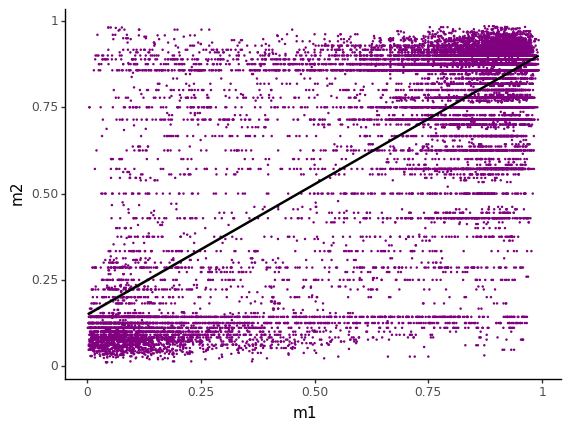

<ggplot: (8784703069242)>

In [138]:
yflB_YFL03= pd.read_csv(PATH_DIR/'dmr-YFL_B-YFL_3.txt', sep='\t')
ggplot(yflB_YFL03, aes(x='m1', y='m2')) + geom_point(color='purple', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [139]:
yflB_YFL03[['diff']].var()

diff    0.038535
dtype: float64

In [140]:
yflB_YFL03_annot= yflB_YFL03[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yflB_YFL03_annot['chr'] = str("chr")+ (yflB_YFL03_annot['chr']).astype(str)

yflB_YFL03_Bonferroni= yflB_YFL03_annot.loc[yflB_YFL03_annot['p'] <= (0.05/len(yflB_YFL03_annot))]

yflB_YFL03_annot.to_csv(PATH_DIR/'Annotation/yflB_YFL03_annotation.txt', sep="\t", header=False, index=False)
yflB_YFL03_Bonferroni.to_csv(PATH_DIR/'Annotation/yflB_YFL03_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yflB_YFL03_Bonferroni.head()



chr  binstart   binend             p      diff        m1        m2
208  chr1   6796201  6799200  7.528404e-08  0.801126  0.878049  0.076923
209  chr1   6796801  6799800  0.000000e+00  0.865424  0.913043  0.047619
210  chr1   6797401  6800400  0.000000e+00  0.869048  0.916667  0.047619
211  chr1   6798001  6801000  0.000000e+00  0.884584  0.932203  0.047619
212  chr1   6798601  6801600  0.000000e+00  0.890842  0.938462  0.047619

In [141]:
print("Total number of CpG sites for annotation:", len(yflB_YFL03_annot))
print("Bonferroni significant number of CpG sites:", len(yflB_YFL03_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yflB_YFL03.loc[yflB_YFL03['p'] <= (0.05/len(yflB_YFL03))])/len(yflB_YFL03)*100)

Total number of CpG sites for annotation: 24334
Bonferroni significant number of CpG sites: 183
Percentage of Bonferroni significant DMRs: 0.7520341908440865


#### 4.YFL_04

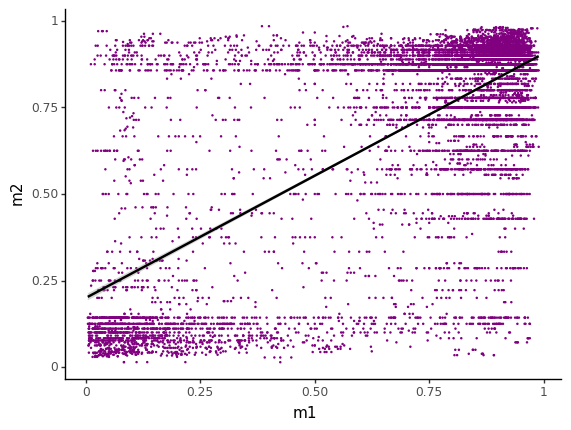

<ggplot: (8784702247253)>

In [142]:
yflB_YFL04= pd.read_csv(PATH_DIR/'dmr-YFL_B-YFL_4.txt', sep='\t')
ggplot(yflB_YFL04, aes(x='m1', y='m2')) + geom_point(color='purple', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [143]:
yflB_YFL04[['diff']].var()

diff    0.047238
dtype: float64

In [144]:
yflB_YFL04_annot= yflB_YFL04[['chr', 'binstart', 'binend', 'p', 'diff', 'm1', 'm2']]
yflB_YFL04_annot['chr'] = str("chr")+ (yflB_YFL04_annot['chr']).astype(str)

yflB_YFL04_Bonferroni= yflB_YFL04_annot.loc[yflB_YFL04_annot['p'] <= (0.05/len(yflB_YFL04_annot))]

yflB_YFL04_annot.to_csv(PATH_DIR/'Annotation/yflB_YFL04_annotation.txt', sep="\t", header=False, index=False)
yflB_YFL04_Bonferroni.to_csv(PATH_DIR/'Annotation/yflB_YFL04_Bonferroni_significant_annotation.txt', sep="\t", header=False, index=False)

yflB_YFL04_Bonferroni.head()



chr   binstart     binend             p      diff        m1        m2
350  chr1   45473401   45476400  9.610091e-13  0.579035  0.624490  0.045455
687  chr1  183439801  183442800  8.561865e-08 -0.907143  0.021429  0.928571
688  chr1  183440401  183443400  8.653014e-08 -0.902732  0.025840  0.928571
689  chr1  183441001  183444000  1.141993e-07 -0.847733  0.080838  0.928571
690  chr1  183441601  183444600  1.161094e-07 -0.805223  0.123348  0.928571

In [145]:
print("Total number of CpG sites for annotation:", len(yflB_YFL04_annot))
print("Bonferroni significant number of CpG sites:", len(yflB_YFL04_Bonferroni))
print("Percentage of Bonferroni significant DMRs:",
      len(yflB_YFL04.loc[yflB_YFL04['p'] <= (0.05/len(yflB_YFL04))])/len(yflB_YFL04)*100)

Total number of CpG sites for annotation: 11952
Bonferroni significant number of CpG sites: 203
Percentage of Bonferroni significant DMRs: 1.6984605087014726


#### 5. YFL_05

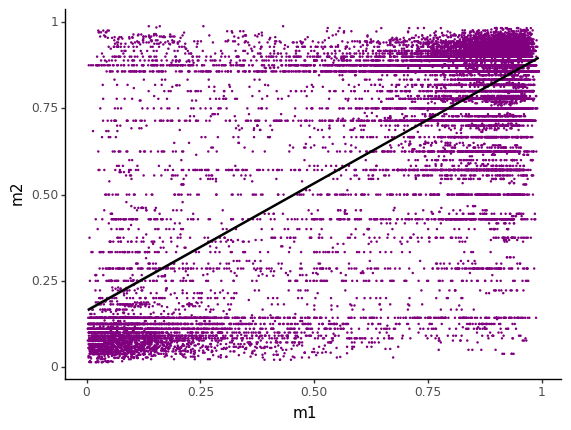

<ggplot: (8784705138164)>

In [146]:
yflB_YFL05= pd.read_csv(PATH_DIR/'dmr-YFL_B-YFL_5.txt', sep='\t')
ggplot(yflB_YFL05, aes(x='m1', y='m2')) + geom_point(color='purple', size=.0001)+ \
    geom_smooth(method='lm', se=True)+ theme_classic()

In [147]:
yflB_YFL05[['diff']].var()

diff    0.040272
dtype: float64

In [148]:
import os
def read_folder(path):
    """
    Function to read dmr files.
    """

    all_dfs = dict()
    
    # Iterate over all the files in the directory
    for file in os.listdir(path):
        if file.endswith('.txt'):
            
            file_path =f"{path}/{file}"
            #filename = f'{number}.txt'
            #fullpath = os.path.join(path, filename)

        if os.path.exists(file_path):
            all_dfs[file] = pd.read_csv(file_path, sep='\t')
        else:
            print('No file at given location')
        

    #return all_dfs
    return all_dfs.keys()

In [51]:
for file in os.listdir('/Users/reza/Documents/methylation_project/IR_TCells/04_DMW_variance_noise/DMR'):
    print(file)

dmr-YFC_B-YFC_2.txt
dmr-YFC_B-YFC_3.txt
dmr-CFC_B-CFC_5.txt
dmr-YFC_B-YFC_1.txt
dmr-CFC_B-CFC_4.txt
dmr-CFC_B-CFC_B.txt
dmr-YFC_B-YFC_4.txt
dmr-YFC_B-YFC_B.txt
dmr-YFC_B-YFC_5.txt
dmr-CFC_B-CFC_1.txt
dmr-CFC_B-CFC_3.txt
dmr-CFC_B-CFC_2.txt
dmr-OFC_B-OFC_5.txt
dmr-OFC_B-OFC_4.txt
dmr-OFC_B-OFC_B.txt
dmr-OFC_B-OFC_1.txt
dmr-OFC_B-OFC_3.txt
dmr-OFC_B-OFC_2.txt
dmr-CFL_B-CFL_1.txt
dmr-YFL_B-YFL_5.txt
dmr-YFL_B-YFL_4.txt
dmr-YFL_B-YFL_B.txt
dmr-CFL_B-CFL_2.txt
dmr-CFL_B-CFL_3.txt
dmr-YFL_B-YFL_3.txt
dmr-YFL_B-YFL_2.txt
dmr-CFL_B-CFL_4.txt
dmr-CFL_B-CFL_B.txt
dmr-YFL_B-YFL_1.txt
dmr-CFL_B-CFL_5.txt


In [149]:

read_folder('/Users/reza/Documents/methylation_project/IR_TCells/04_DMW_variance_noise/DMR')

dict_keys(['dmr-YFC_B-YFC_2.txt', 'dmr-YFC_B-YFC_3.txt', 'dmr-CFC_B-CFC_5.txt', 'dmr-YFC_B-YFC_1.txt', 'dmr-CFC_B-CFC_4.txt', 'dmr-CFC_B-CFC_B.txt', 'dmr-YFC_B-YFC_4.txt', 'dmr-YFC_B-YFC_B.txt', 'dmr-YFC_B-YFC_5.txt', 'dmr-CFC_B-CFC_1.txt', 'dmr-CFC_B-CFC_3.txt', 'dmr-CFC_B-CFC_2.txt', 'dmr-OFC_B-OFC_5.txt', 'dmr-OFC_B-OFC_4.txt', 'dmr-OFC_B-OFC_B.txt', 'dmr-OFC_B-OFC_1.txt', 'Annotation', 'dmr-OFC_B-OFC_3.txt', 'dmr-OFC_B-OFC_2.txt', 'dmr-CFL_B-CFL_1.txt', 'dmr-YFL_B-YFL_5.txt', 'dmr-YFL_B-YFL_4.txt', 'dmr-YFL_B-YFL_B.txt', 'dmr-CFL_B-CFL_2.txt', 'dmr-CFL_B-CFL_3.txt', 'dmr-YFL_B-YFL_3.txt', 'dmr-YFL_B-YFL_2.txt', 'dmr-CFL_B-CFL_4.txt', 'dmr-CFL_B-CFL_B.txt', 'dmr-YFL_B-YFL_1.txt', 'dmr-CFL_B-CFL_5.txt'])